

---


# **Twitter Data Collection**
#### ***Correlation between after-hours twitter data and movement of individual company stock price on a daily basis***


---



**Final Project**
CSCI 49362/76000   |   Fall 2020 

##### Hannah Do, Andrew Lee, Phillip Chen







**1. Using Snscrape to collect URLs of the queried tweets**


Timeframe : Collection of tweets during the off-hour of the stock market (4:30 pm - 9:00 am)




In [1]:
! pip3 install snscrape

In [2]:
! pip install tweepy

In [1]:
# Import all the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

import datetime, string, re
import sys, os

import tweepy
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from collections import Counter

print('All Libraries Sucessfully Imported')

All Libraries Sucessfully Imported


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/doguma/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/doguma/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/doguma/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


---
Fetching stock data file to retrieve corresponding dates :

In [171]:

# diff = pd.read_csv(path + "/diff_3mo_final.csv", index_col= None, header = None)
# dates = list(diff[1])
# dates

dates = [ 
'2020-09-08', '2020-09-09', '2020-09-10', '2020-09-11', '2020-09-14', '2020-09-15', '2020-09-16', 
'2020-09-17', '2020-09-18', '2020-09-21', '2020-09-22', '2020-09-23', '2020-09-24', '2020-09-25',
'2020-09-28', '2020-09-29', '2020-09-30', '2020-10-01', '2020-10-02', '2020-10-05', '2020-10-06',
'2020-10-07', '2020-10-08', '2020-10-09', '2020-10-12', '2020-10-13', '2020-10-14', '2020-10-15',  
'2020-10-16', '2020-10-19', '2020-10-20', '2020-10-21', '2020-10-22', '2020-10-23', '2020-10-26', 
'2020-10-27', '2020-10-28', '2020-10-29', '2020-10-30', '2020-11-02', '2020-11-03', '2020-11-04',
'2020-11-05', '2020-11-06', '2020-11-09', '2020-11-10', '2020-11-11', '2020-11-12', '2020-11-13',
'2020-11-16', '2020-11-17', '2020-11-18', '2020-11-19', '2020-11-20', '2020-11-23', '2020-11-24', 
'2020-11-25', '2020-11-27', '2020-11-30', '2020-12-01', '2020-12-02', '2020-12-03'
  ]

---
Looping over each company name (or ticker symbol) queries for given timeframe :

In [13]:

companies = ['AAPL', 'apple', 'MSFT', 'microsoft', 'FB', 'facebook', 'GOOG', 'google', 'AMZN', 'amazon']
# companies with their ticker symbol names and regular names

for company in companies:
    os.mkdir(os.path.join(path,company))
# create folder for each company

In [8]:
# Storing twitter URLs in according folders

for company in companies:
    
    path = os.path.abspath(os.getcwd())
    path = os.path.join(path,'drive/MyDrive/Final_Project_NLP_Fall_2020')
    path = os.path.join(path, company)

    i=0    
    for i in range(len(dates)-1):
        !snscrape twitter-search "#{company} since:{dates[i]}-16-30 until:{dates[i+1]}-09-00" > {path}/{company}_{dates[i+1]}.txt
        i += i+1

In [165]:
# Twitter tokens to convert urls into twitter texts
# Available through Twitter Developer Accounts

consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''


auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

sid = SentimentIntensityAnalyzer()


In [64]:
# dates.pop(0)
# text files stored starting from the second row (date)
len(dates)

62

In [4]:
# function that gets ID of the tweets and returns the text/content of the tweets

def fetch_tw(ids):
    list_of_tw_status = api.statuses_lookup(ids, tweet_mode= "extended")
    empty_data = pd.DataFrame()
    for status in list_of_tw_status:
            tweet_elem = {"tweet_id": status.id,
                     "screen_name": status.user.screen_name,
                     "tweet":status.full_text,
                          # status.text,
                     "date":status.created_at}
            empty_data = empty_data.append(tweet_elem, ignore_index = True)
    return empty_data

**2. Using Tweepy to convert the URLs into content of the tweets**

This runs locally on Jupyter Notebook, however not on Google Colab due to 'tweet mode' being no longer available.


In [166]:
# for company in companies:
    
# company = 'AAPL'
# company = 'apple'
# company = 'MSFT'
# ...

company = 'facebook'
# Tried each one at a time because of Tweet collection limit - 
# pausing because of rate limit caused malforming of the exporting files

# path = os.path.abspath(os.getcwd())
# path = os.path.join(path,'drive/MyDrive/Final_Project_NLP_Fall_2020')
# path = os.path.join(path, company)

i=0    
for i in range(len(dates)):

    tweet_url = pd.read_csv( company + "/" + company + "_" + str(dates[i]) + ".txt", index_col= None, header = None, names = ["links"])
    tweet_url.head()

    af = lambda x: x["links"].split("/")[-1]
    tweet_url['id'] = tweet_url.apply(af, axis=1)

    ids = tweet_url['id'].tolist()

    total_count = len(ids)
    chunks = (total_count - 1) // 50 + 1

    for j in range(chunks):
          batch = ids[j*50:(j+1)*50]
          temp2 = pd.DataFrame(fetch_tw(batch))
          temp2.to_csv(company + "/" + company + "_" + str(dates[i]) +".csv", mode="a")  


---
**3. Sentiment Analysis using Vader** - lists of tweet volume and sentiments (before and after removal of neutral tweets) are stored


In [172]:
# ticker symbols of each company
    
# company = 'AAPL'
# company = 'MSFT'
# company = 'AMZN'
# ...

company = 'FB'
    
list_before = []
# Compound mean of the tweets
list_after = []
# Compound mean without the neutral (0.0) values
list_volume = []
# number of tweets

#     path = os.path.abspath(os.getcwd())
#     path = os.path.join(path,'drive/MyDrive/Final_Project_NLP_Fall_2020')
#     path = os.path.join(path, company)

i=0
for i in range(len(dates)):

    tweet_text = pd.read_csv(company + "/" + company + "_" + str(dates[i]) +".csv", index_col= None, header = None)

    temp = pd.DataFrame()
    temp['tweet'] = tweet_text[3]

    temp.drop(temp.head(1).index,inplace=True)

#     temp['score_dict'] = temp['tweet'].apply(lambda x: sid.polarity_scores(str(x)))
    temp['score_neutral'] = temp['tweet'].apply(lambda x: list(sid.polarity_scores(str(x)).values())[3])

    tweet_polarity = pd.DataFrame()
    tweet_polarity['score_polar'] = temp['score_neutral']

    tweet_polarity = tweet_polarity[tweet_polarity['score_polar'] != 0]

    list_volume.append(len(temp))
    list_before.append(temp[['score_neutral']].mean(axis=0))
    list_after.append(tweet_polarity[['score_polar']].mean(axis=0))


In [173]:
# names of each company
    
# company = 'apple'
# company = 'microsoft'
# company = 'amazon'
# ...

company = 'facebook'
    
list_before2 = []
# Compound mean of the tweets
list_after2 = []
# Compound mean without the neutral (0.0) values
list_volume2 = []
# number of tweets

#     path = os.path.abspath(os.getcwd())
#     path = os.path.join(path,'drive/MyDrive/Final_Project_NLP_Fall_2020')
#     path = os.path.join(path, company)

i=0
for i in range(len(dates)):

    tweet_text = pd.read_csv(company + "/" + company + "_" + str(dates[i]) +".csv", delimiter=',', skip_blank_lines=False)
    # skip_blank_lines : allows 'malformed' csv files
    temp = pd.DataFrame()
    temp['tweet'] = tweet_text['tweet']

    temp.drop(temp.head(1).index,inplace=True)

#     temp['score_dict'] = temp['tweet'].apply(lambda x: sid.polarity_scores(str(x)))
    temp['score_neutral'] = temp['tweet'].apply(lambda x: list(sid.polarity_scores(str(x)).values())[3])

    tweet_polarity = pd.DataFrame()
    tweet_polarity['score_polar'] = temp['score_neutral']

    tweet_polarity = tweet_polarity[tweet_polarity['score_polar'] != 0]

    list_volume2.append(len(temp))
    list_before2.append(temp[['score_neutral']].mean(axis=0))
    list_after2.append(tweet_polarity[['score_polar']].mean(axis=0))


In [174]:
len(list_before),len(list_after),len(list_volume), len(list_volume2),len(list_before2),len(list_after2),len(list_volume2),
# checking if the length are the same

(62, 62, 62, 62, 62, 62, 62)

In [175]:
diff = pd.read_csv("diff_3mo_final.csv", index_col= None, header = None)

diff.drop(diff.head(1).index,inplace=True) 

diff
# opening previous Stock Data file retrieved through Google Colab

,0,1,2,3,4,5,6,7
1,2020-09-08,-7.010002136230469,-7.75,-11.45001220703125,-57.530029296875,-150.6201171875,-55.080078125,-412.4296875
2,2020-09-09,4.44000244140625,4.94000244140625,4.6099853515625,25.1400146484375,53.14990234375,37.97998046875,217.0693359375
3,2020-09-10,3.0400009155273438,2.1100006103515625,1.790008544921875,3.6800537109375,38.60986328125,13.60009765625,93.970703125
4,2020-09-11,1.0800018310546875,1.8300018310546875,1.970001220703125,3.97998046875,33.579833984375,13.510009765625,90.48046875
5,2020-09-14,2.720001220703125,0.2100067138671875,4.34002685546875,18.2850341796875,56.719970703125,22.590087890625,156.58984375
...,...,...,...,...,...,...,...,...
58,2020-11-27,0.5400009155273438,0.980010986328125,1.800018310546875,1.659912109375,26.18994140625,8.900146484375,64.779296875
59,2020-11-30,0.3800048828125,-1.1299896240234375,-1.779998779296875,-12.0059814453125,13.139892578125,-4.170166015625,18.400390625
60,2020-12-01,1.9599990844726562,0.4399871826171875,2.19000244140625,13.6300048828125,20.4599609375,24.240234375,114.6201171875
61,2020-12-02,-0.7000045776367188,-1.3300018310546875,-1.19000244140625,0.0,1.56982421875,-8.669921875,-69.3603515625


In [176]:

temp = pd.DataFrame()
temp['date'] = diff[0]
# add date

# temp['microsoft stock'] = diff[2]
# temp['google stock'] = diff[1]
# temp['amazon stock'] = diff[5]
temp['facebook stock'] = diff[3]
# temp['google stock'] = diff[4]

temp['S&P 500'] = diff[6]
temp['NASDAQ'] = diff[7]
# add each stock values to the table

In [177]:

temp['day of week'] = temp['date'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d').weekday())
temp

,date,facebook stock,S&P 500,NASDAQ,day of week
1,2020-09-08,-11.45001220703125,-55.080078125,-412.4296875,1
2,2020-09-09,4.6099853515625,37.97998046875,217.0693359375,2
3,2020-09-10,1.790008544921875,13.60009765625,93.970703125,3
4,2020-09-11,1.970001220703125,13.510009765625,90.48046875,4
5,2020-09-14,4.34002685546875,22.590087890625,156.58984375,0
...,...,...,...,...,...
58,2020-11-27,1.800018310546875,8.900146484375,64.779296875,4
59,2020-11-30,-1.779998779296875,-4.170166015625,18.400390625,0
60,2020-12-01,2.19000244140625,24.240234375,114.6201171875,1
61,2020-12-02,-1.19000244140625,-8.669921875,-69.3603515625,2


In [178]:
# Convert the compound scores from tuple to element format

newlist = []

for x in range(0, len(list_after)):
    newlist.append(list_after[x][0])
    

newlist2 = []

for x in range(0, len(list_before)):
    newlist2.append(list_before[x][0])


newlist3 = []

for x in range(0, len(list_before2)):
    newlist3.append(list_before2[x][0])
    
    
newlist4 = []

for x in range(0, len(list_after2)):
    newlist4.append(list_after2[x][0])
    

In [179]:

len(newlist), len(list_volume)


(62, 62)

In [180]:
temp['tick_neutral'] = newlist
temp['tick_polar'] = newlist2

temp['name_neutral'] = newlist3
temp['name_polar'] = newlist4

temp['tick_volume'] = list_volume
temp['name_volume'] = list_volume2

temp.head(20)

# add twitter sentiment and volume counts to the table

,date,facebook stock,S&P 500,NASDAQ,day of week,tick_neutral,tick_polar,name_neutral,name_polar,tick_volume,name_volume
1,2020-09-08,-11.45001220703125,-55.080078125,-412.4296875,1,0.108090,0.024428,0.065194,0.141704,7332,14889
2,2020-09-09,4.6099853515625,37.97998046875,217.0693359375,2,0.106823,0.023107,0.066580,0.142340,2085,3799
3,2020-09-10,1.790008544921875,13.60009765625,93.970703125,3,0.093981,0.021984,0.048625,0.112497,1975,4449
4,2020-09-11,1.970001220703125,13.510009765625,90.48046875,4,0.068263,0.016330,0.068714,0.152931,1810,4173
5,2020-09-14,4.34002685546875,22.590087890625,156.58984375,0,0.062158,0.012275,0.073728,0.154785,5383,9989
6,2020-09-15,4.52001953125,24.18994140625,137.3095703125,1,0.073663,0.015423,0.068084,0.132216,1815,4115
7,2020-09-16,-5.1300048828125,10.030029296875,31.759765625,2,0.035568,0.007430,0.035919,0.071735,2025,4917
8,2020-09-17,-5.239990234375,-38.6298828125,-254.419921875,3,0.094093,0.020314,0.065211,0.137193,2001,4883
9,2020-09-18,3.579986572265625,0.369873046875,63.169921875,4,0.012960,0.002942,0.063972,0.146262,2026,5334
10,2020-09-21,-4.9900054931640625,-33.89990234375,-183.140625,0,0.098144,0.021251,0.070133,0.150326,5191,11118


In [134]:
temp.to_csv("_ds.csv", mode="a")
# checkpoint

In [181]:

temp['facebook stock'] = temp['facebook stock'].apply(lambda x: float(x))

temp['S&P 500'] = temp['S&P 500'].apply(lambda x: float(x))
temp['NASDAQ'] = temp['NASDAQ'].apply(lambda x: float(x))
temp['tick_neutral'] = temp['tick_neutral'].apply(lambda x: float(x))
temp['tick_polar'] = temp['tick_polar'].apply(lambda x: float(x))
temp['name_neutral'] = temp['name_neutral'].apply(lambda x: float(x))
temp['name_polar'] = temp['tick_polar'].apply(lambda x: float(x))


temp['target'] = temp['facebook stock'].apply(lambda x: 1 if x>0 else 0)

temp
# added binary values for stock increase or decrease

,date,facebook stock,S&P 500,NASDAQ,day of week,tick_neutral,tick_polar,name_neutral,name_polar,tick_volume,name_volume,target
1,2020-09-08,-11.450012,-55.080078,-412.429688,1,0.108090,0.024428,0.065194,0.024428,7332,14889,0
2,2020-09-09,4.609985,37.979980,217.069336,2,0.106823,0.023107,0.066580,0.023107,2085,3799,1
3,2020-09-10,1.790009,13.600098,93.970703,3,0.093981,0.021984,0.048625,0.021984,1975,4449,1
4,2020-09-11,1.970001,13.510010,90.480469,4,0.068263,0.016330,0.068714,0.016330,1810,4173,1
5,2020-09-14,4.340027,22.590088,156.589844,0,0.062158,0.012275,0.073728,0.012275,5383,9989,1
...,...,...,...,...,...,...,...,...,...,...,...,...
58,2020-11-27,1.800018,8.900146,64.779297,4,0.114942,0.029564,0.097486,0.029564,1283,6231,1
59,2020-11-30,-1.779999,-4.170166,18.400391,0,0.160934,0.032187,0.101926,0.032187,2295,8847,0
60,2020-12-01,2.190002,24.240234,114.620117,1,0.166882,0.047135,0.079580,0.047135,786,3168,1
61,2020-12-02,-1.190002,-8.669922,-69.360352,2,0.167900,0.047800,0.074975,0.047800,699,3697,0


In [182]:
# SCALING : Normalization of the column values

temp_scaled = pd.DataFrame(temp)

temp_scaled['facebook stock'] = (temp_scaled['facebook stock'] - temp_scaled['facebook stock'].mean())/temp_scaled['facebook stock'].std(ddof=0)
temp_scaled['S&P 500'] = (temp_scaled['S&P 500'] - temp_scaled['S&P 500'].mean())/temp_scaled['S&P 500'].std(ddof=0)
temp_scaled['NASDAQ'] = (temp_scaled['NASDAQ'] - temp_scaled['NASDAQ'].mean())/temp_scaled['NASDAQ'].std(ddof=0)
temp_scaled['tick_neutral'] = (temp_scaled['tick_neutral'] - temp_scaled['tick_neutral'].mean())/temp_scaled['tick_neutral'].std(ddof=0)
temp_scaled['tick_polar'] = (temp_scaled['tick_polar'] - temp_scaled['tick_polar'].mean())/temp_scaled['tick_polar'].std(ddof=0)
temp_scaled['name_neutral'] = (temp_scaled['name_neutral'] - temp_scaled['name_neutral'].mean())/temp_scaled['name_neutral'].std(ddof=0)
temp_scaled['name_polar'] = (temp_scaled['name_polar'] - temp_scaled['name_polar'].mean())/temp_scaled['name_polar'].std(ddof=0)


temp_scaled

# Getting z-scores for the column values - standardizes the format

,date,facebook stock,S&P 500,NASDAQ,day of week,tick_neutral,tick_polar,name_neutral,name_polar,tick_volume,name_volume,target
1,2020-09-08,-2.884357,-2.699450,-3.679429,1,-0.264711,-0.429257,-0.131369,-0.429257,7332,14889,0
2,2020-09-09,0.961036,1.499053,1.628075,2,-0.282752,-0.490928,-0.058978,-0.490928,2085,3799,1
3,2020-09-10,0.285823,0.399129,0.590191,3,-0.465540,-0.543299,-0.996436,-0.543299,1975,4449,1
4,2020-09-11,0.328920,0.395064,0.560764,4,-0.831592,-0.807170,0.052433,-0.807170,1810,4173,1
5,2020-09-14,0.896397,0.804722,1.118153,0,-0.918482,-0.996448,0.314180,-0.996448,5383,9989,1
...,...,...,...,...,...,...,...,...,...,...,...,...
58,2020-11-27,0.288220,0.187085,0.344069,4,-0.167186,-0.189549,1.554596,-0.189549,1283,6231,1
59,2020-11-30,-0.568977,-0.402595,-0.046966,0,0.487444,-0.067150,1.786427,-0.067150,2295,8847,0
60,2020-12-01,0.381597,0.879170,0.764293,1,0.572105,0.630462,0.619711,0.630462,786,3168,1
61,2020-12-02,-0.427708,-0.605607,-0.786904,2,0.586588,0.661503,0.379316,0.661503,699,3697,0


In [183]:
temp_scaled['date'] = temp_scaled['date'].apply(lambda x: x.replace("-", ""))
temp_scaled['date'] = temp_scaled['date'].apply(lambda x: int(x))

temp_scaled['date']

# changing date format for ML pre-processing

1     20200908
2     20200909
3     20200910
4     20200911
5     20200914
        ...   
58    20201127
59    20201130
60    20201201
61    20201202
62    20201203
Name: date, Length: 62, dtype: int64

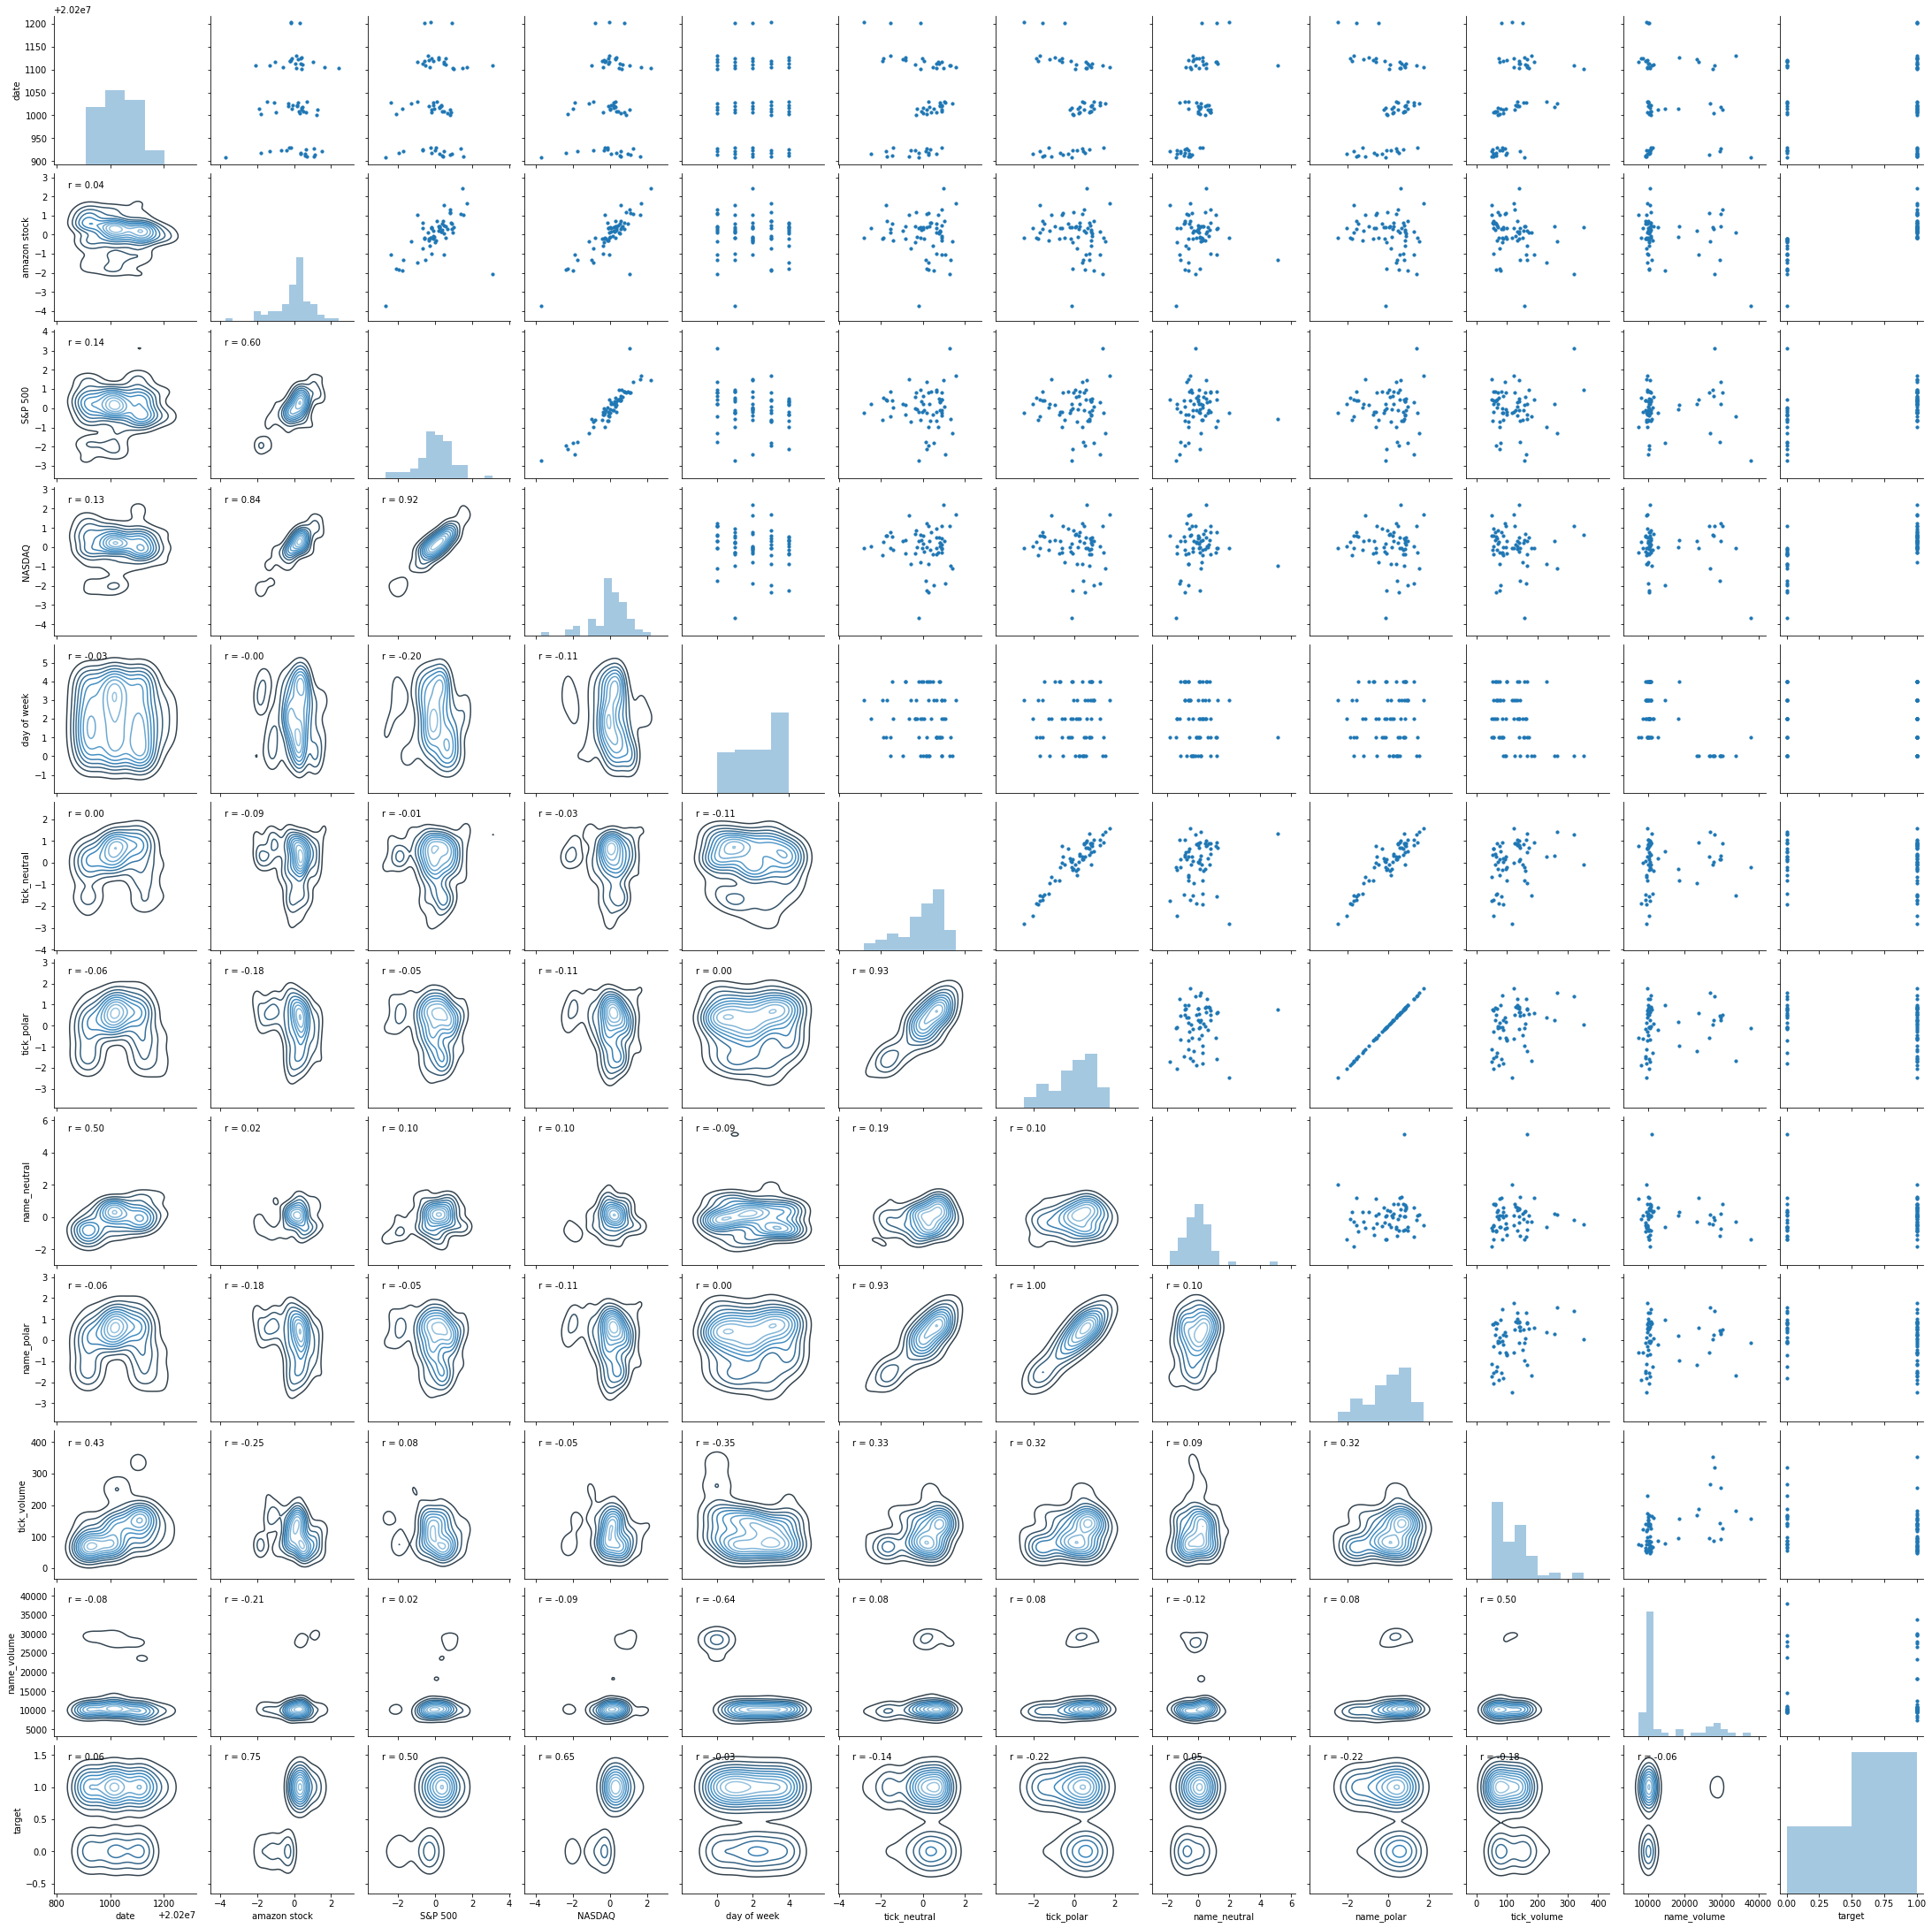

In [122]:
# sns.pairplot(fb_ds)
from scipy import stats

def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)

g = sns.PairGrid(temp_scaled, palette=["red"])
g.map_upper(plt.scatter, s=10)
g.map_diag(sns.distplot, kde=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_lower(corrfunc)


# correlation between each features

In [184]:
temp_scaled = temp_scaled.dropna()
temp_scaled

# Dropping NaN or missing values

,date,facebook stock,S&P 500,NASDAQ,day of week,tick_neutral,tick_polar,name_neutral,name_polar,tick_volume,name_volume,target
1,20200908,-2.884357,-2.699450,-3.679429,1,-0.264711,-0.429257,-0.131369,-0.429257,7332,14889,0
2,20200909,0.961036,1.499053,1.628075,2,-0.282752,-0.490928,-0.058978,-0.490928,2085,3799,1
3,20200910,0.285823,0.399129,0.590191,3,-0.465540,-0.543299,-0.996436,-0.543299,1975,4449,1
4,20200911,0.328920,0.395064,0.560764,4,-0.831592,-0.807170,0.052433,-0.807170,1810,4173,1
5,20200914,0.896397,0.804722,1.118153,0,-0.918482,-0.996448,0.314180,-0.996448,5383,9989,1
...,...,...,...,...,...,...,...,...,...,...,...,...
58,20201127,0.288220,0.187085,0.344069,4,-0.167186,-0.189549,1.554596,-0.189549,1283,6231,1
59,20201130,-0.568977,-0.402595,-0.046966,0,0.487444,-0.067150,1.786427,-0.067150,2295,8847,0
60,20201201,0.381597,0.879170,0.764293,1,0.572105,0.630462,0.619711,0.630462,786,3168,1
61,20201202,-0.427708,-0.605607,-0.786904,2,0.586588,0.661503,0.379316,0.661503,699,3697,0


In [185]:
temp_scaled.to_csv("facebook_scaled.csv", mode="a")
# scaled format saved